# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [4]:
import numpy as np
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2 * np.sin(x));


Ensure your function works with numpy arrays:

In [5]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [17]:
import numpy as np
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return (2*x*np.sin(x) - ((x**2 - 2) * np.cos(x)) -2);


Check your solution with the same numpy array:

In [18]:
assert g(0) == 0.

In [38]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [21]:
import numpy as np
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return (2*x*np.sin(x) - ((x**2 - 2) * np.cos(x)) -2);

def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return (g(xmax) - g(xmin));


Check your analytic function:

In [22]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [75]:
import numpy as np
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2 * np.sin(x));
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    deltax = (xmax - xmin) / N
    deltax2 = (xmax - xmin - 2 * deltax)/(N - 2)
    xzero = f(xmin)
    xn = f(xmax)
    range1 = np.arange((xmin +deltax), xmax, 2*deltax)
    range2 = np.arange((xmin + 2 * deltax), xmax, 2 *deltax)
    summed1 = 0
    summed2 = 0
    
    for i in range1:
        summed1 = 4*f(i) + summed1
      
    for i in range2:
        summed2 = 2*f(i) + summed2
    
# summed = 0
   # for i in r:
    #    summed = (summed + 4* f(i)+ 2* f(i + deltax))
     #   return summed
    return (deltax * (xzero + xn + summed1 + summed2)/3);
integrate_numeric(0,4,4)
    

1.2039145730218024

Make sure you have implemented Simpson's rule correctly:

In [74]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

AssertionError: 

In [73]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Plot showing log relationship between error in Simpsons rule and number of panels used')

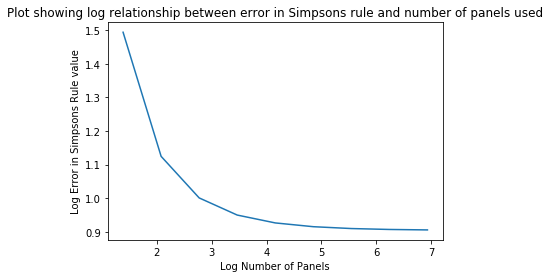

In [109]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x**2 * np.sin(x));
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    deltax = (xmax - xmin) / N
    deltax2 = (xmax - xmin - 2 * deltax)/(N - 2)
    xzero = f(xmin)
    xn = f(xmax)
    range1 = np.arange((xmin +deltax), xmax, 2*deltax)
    range2 = np.arange((xmin + 2 * deltax), xmax, 2 *deltax)
    summed1 = 0
    summed2 = 0
    
    for i in range1:
        summed1 = 4*f(i) + summed1
      
    for i in range2:
        summed2 = 2*f(i) + summed2
    
# summed = 0
   # for i in r:
    #    summed = (summed + 4* f(i)+ 2* f(i + deltax))
     #   return summed
    return (deltax * (xzero + xn + summed1 + summed2)/3);







x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024] # Panel numbers to use
panel_countslog = np.log(panel_counts)
result_analytic = integrate_analytic(x0, x1)# Define reference value from analytical solution
numeric = [0,0,0,0,0,0,0,0,0]
result_analyticlog = (result_analytic)
for i in range(0,9,1):
    numeric[i] = np.log( integrate_numeric(x0, x1, panel_counts[i]-result_analyticlog ))
    
plt.plot(panel_countslog, numeric)
plt.xlabel("Log Number of Panels")
plt.ylabel("Log Error in Simpsons Rule value")
plt.title("Plot showing log relationship between error in Simpsons rule and number of panels used")





What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels used increases the accuracy of the numerical method exponentially and it converges to a minimum error faster with more panels. If the number of panels becomes too large the error converges to a certain value and changes very little.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The line would be straight so increasing the number of panels would increase accuracy by the same factor but for Simpson's rule as can be clearly seen increasing number of panels produces an exponential decay.